In [ ]:
'''
Using Naive Bayes model to train email ham/spam classifier.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import joblib 

DATA_URL = 'https://github.com/codebasics/py/raw/master/ML/14_naive_bayes/spam.csv'

def get_datasets(url):
    # use pandas to read in email ham/spam data
    data_frame = pd.read_csv(DATA_URL)

    # create separate variables for 'Category' and 'Message'
    categories = data_frame.Category.values
    messages = data_frame.Message.values

    # split the data into 70% training data and 30% testing data
    x_train, x_test, y_train, y_test = train_test_split(messages, categories, test_size=0.3, random_state=0)

    return (x_train, y_train), (x_test, y_test)

def create_model(training_set, training_labels):   
    return Pipeline([("vectorizer", CountVectorizer()), ("nb", MultinomialNB())]).fit(training_set, training_labels)

def display_confusion_matrix(actual, predicted):
    # generate the confusion matrix
    results = confusion_matrix(actual, predicted, labels=["spam", "ham"])
    
    # labels for ham or spam
    category_labels = ['spam', 'ham']

    # use seaborn to generate visual of the confusion matrix
    sns.heatmap(results, 
                annot=True, 
                fmt='.0f', 
                linewidths=0.5,
                annot_kws={'fontsize': 13}, 
                square=True, 
                xticklabels=category_labels,
                yticklabels=category_labels)
    
def report_results(actual, predicted):
    print(f'Accuracy Score: {accuracy_score(actual, predicted) * 100:.2f}%\n')

    print(f'Classification Report:\n {classification_report(actual, predicted)}')

    # convert actual and predicted values to ints to enable calculating f1_score
    actual_nums = [1 if x == 'ham' else 0 for x in actual]
    predicted_nums = [1 if x == 'ham' else 0 for x in predicted]
    f_measure = f1_score(actual_nums, predicted_nums)
    print(f'F-Measure: {f_measure:.3f}\n');
    
def make_prediction(model, email):
    print(f'email: {email}\nemail prediction: {model.predict(email)}\n')
    
def save_model(model, name):
    joblib.dump(model, name) 

# call functions to get data and create the model
(x_train, y_train), (x_test, y_test) = get_datasets(DATA_URL)
model = create_model(x_train, y_train)

# make predictions based on the trained data
predicted = model.predict(x_test)

# dump out the model to be used by the REST endpoint for making predictions
model_name = 'email_classifer.pkl'
save_model(model, model_name)


In [ ]:
# test on a ham email
make_prediction(model, np.array(['Hello, need me to pick anything up from the grocery store?']))

# test on a spam email
make_prediction(model, np.array(['You are the lucky winner!  Contact now to claim prize.']))

# test making prediction with re-constituted model to ensure it works correctly
model1 = joblib.load(model_name)
make_prediction(model1, np.array(['I\'m a ham email']))

email: ['Hello, need me to pick anything up from the grocery store?']
email prediction: ['ham']

email: ['You are the lucky winner!  Contact now to claim prize.']
email prediction: ['spam']

email: ["I'm a ham email"]
email prediction: ['ham']



Accuracy Score: 98.56%

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1451
        spam       0.98      0.91      0.94       221

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672

F-Measure: 0.992



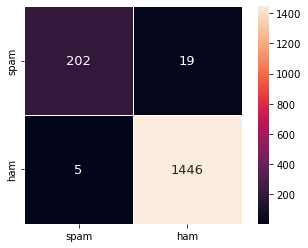

In [ ]:
# show the results
report_results(y_test, predicted)
display_confusion_matrix(y_test, predicted)